In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from deepNN import DNN

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
X = df.iloc[:, 1:-1].to_numpy()
Y = df.iloc[:, -1].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05, random_state=42)
y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)

X_train = (X_train - np.mean(X_train, axis=1, keepdims=True)) / np.std(X_train, axis=1, keepdims=True)
X_test = (X_test - np.mean(X_test, axis = 1, keepdims=True)) / np.std(X_test, axis=1, keepdims=True)

X_train, X_test = X_train.T, X_test.T
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((29, 270566), (1, 270566), (29, 14241), (1, 14241))

In [4]:
layer_dims = [X_train.shape[0], 32, 8, 4, y_train.shape[0]]

('Layer 1 W shape : (32, 29)', 'b shape : (32, 1)')
('Layer 2 W shape : (8, 32)', 'b shape : (8, 1)')
('Layer 3 W shape : (4, 8)', 'b shape : (4, 1)')
('Layer 4 W shape : (1, 4)', 'b shape : (1, 1)')
Cost after iteration0: 0.0001236951376629807
Cost after iteration10: 2.944293684894819e-05
Cost after iteration20: 2.017402504571427e-05
Cost after iteration30: 1.3938454415561604e-05
Cost after iteration40: 1.554638633838497e-05
Cost after iteration50: 2.9673400956863372e-05
Cost after iteration60: 1.8744228506091384e-05
Cost after iteration70: 1.4362169485206376e-05
Cost after iteration80: 1.1852505688696612e-05
Cost after iteration90: 1.1686198815670134e-05
Cost after iteration100: 1.147499925130227e-05
Cost after iteration110: 1.174851594949168e-05
Cost after iteration120: 3.573694652850098e-05
Cost after iteration130: 1.1301353778827875e-05
Cost after iteration140: 1.113435659313167e-05
Cost after iteration150: 1.1260487913400343e-05
Cost after iteration160: 1.1471716524532364e-05
Cos

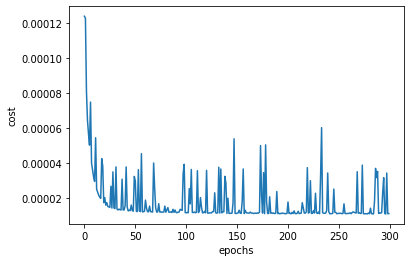

In [5]:
model1 = DNN(layer_dims, lRate=0.45, momentum=0.9, n_iters=300, GD_type='MiniBatchGD', batch_size=1024, optimizer='Momentum', regularizer='L2', regularizer_const=0.7)
costs_1 = model1.fit(X_train, y_train, print_cost=True)
metrics = model1.performance(X_train, y_train)
print(metrics['accuracy'])
plt.plot(np.squeeze(costs_1))
plt.ylabel('cost')
plt.xlabel('epochs')
plt.show()

('Layer 1 W shape : (32, 29)', 'b shape : (32, 1)')
('Layer 2 W shape : (8, 32)', 'b shape : (8, 1)')
('Layer 3 W shape : (4, 8)', 'b shape : (4, 1)')
('Layer 4 W shape : (1, 4)', 'b shape : (1, 1)')
Cost after iteration0: 6.492645299497961e-13
/Users/omkarpitale/Documents/ML/Credit card fraud using DNN/activation_functions.py:11: RuntimeWarning: overflow encountered in exp
  S = 1 / (1 + np.exp(-z))
Cost after iteration10: 3.944000512043975e-06
Cost after iteration20: 8.493904115720656e-19
Cost after iteration30: 8.493904115720656e-19
Cost after iteration40: 7.417006133604209e-07
Cost after iteration50: 1.006353049391894e-06
Cost after iteration60: 0.00012765379387990694
Cost after iteration70: 2.183236073963679e-06
Cost after iteration80: 8.493904115720656e-19
Cost after iteration90: 8.493904115720656e-19
Cost after iteration100: 8.493904115720656e-19
Cost after iteration110: 8.493904115720656e-19
Cost after iteration120: 8.493904115720656e-19
Cost after iteration130: 9.0991253986865

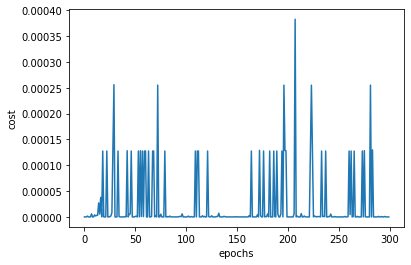

In [6]:
model2 = DNN(layer_dims, lRate=0.3, momentum=0.9, beta=0.98, n_iters=300, GD_type='MiniBatchGD', batch_size=4096, optimizer='Adam')
costs_2 = model2.fit(X_train, y_train, print_cost=True)
metrics = model2.performance(X_train, y_train)
print(metrics['accuracy'])
plt.plot(np.squeeze(costs_2))
plt.ylabel('cost')
plt.xlabel('epochs')
plt.show()

('Layer 1 W shape : (32, 29)', 'b shape : (32, 1)')
('Layer 2 W shape : (8, 32)', 'b shape : (8, 1)')
('Layer 3 W shape : (4, 8)', 'b shape : (4, 1)')
('Layer 4 W shape : (1, 4)', 'b shape : (1, 1)')
Cost after iteration0: 0.0007970244322184532
Cost after iteration10: 4.556890970320752e-05
Cost after iteration20: 3.935466590246201e-06
Cost after iteration30: 2.882827433589354e-06
Cost after iteration40: 2.737678753665621e-05
Cost after iteration50: 1.3280598470154486e-05
Cost after iteration60: 2.3426344883472687e-06
Cost after iteration70: 2.8728024973452903e-06
Cost after iteration80: 2.1919037474338517e-05
Cost after iteration90: 1.9766508147388225e-06
Cost after iteration100: 3.620973745142485e-05
Cost after iteration110: 2.3129707138787997e-06
Cost after iteration120: 5.261864034438614e-05
Cost after iteration130: 3.320202876471476e-05
Cost after iteration140: 2.3772471426186454e-05
Cost after iteration150: 3.49021226666911e-05
Cost after iteration160: 3.3748764456157294e-05
Cost 

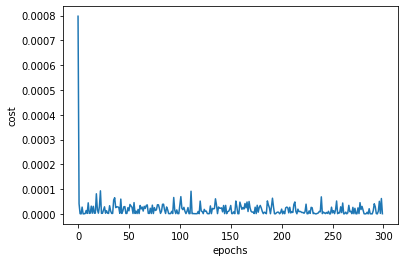

In [7]:
model3 = DNN(layer_dims, lRate=0.45, momentum=0.9, n_iters=300, GD_type='MiniBatchGD', batch_size=30000, optimizer='Momentum')
costs_3 = model3.fit(X_train, y_train)
metrics = model3.performance(X_train, y_train)
print(metrics['accuracy'])
plt.plot(np.squeeze(costs_3))
plt.ylabel('cost')
plt.xlabel('epochs')
plt.show()

('Layer 1 W shape : (32, 29)', 'b shape : (32, 1)')
('Layer 2 W shape : (8, 32)', 'b shape : (8, 1)')
('Layer 3 W shape : (4, 8)', 'b shape : (4, 1)')
('Layer 4 W shape : (1, 4)', 'b shape : (1, 1)')
Cost after iteration0: 0.001408367242475488
Cost after iteration10: 0.0001441493881753306
Cost after iteration20: 0.0001406547604695611
Cost after iteration30: 0.00015236368833732014
Cost after iteration40: 0.0001516465062381575
Cost after iteration50: 0.00012864957810303096
Cost after iteration60: 0.00012807495844989564
Cost after iteration70: 0.0001583231358771067
Cost after iteration80: 0.0001829968653687485
Cost after iteration90: 0.00012444176097273
Cost after iteration100: 0.0001256329665436967
Cost after iteration110: 0.00023943672407082916
Cost after iteration120: 0.00012667623982238604
Cost after iteration130: 0.00019069089714161952
Cost after iteration140: 0.00019801696463933005
Cost after iteration150: 0.0001436386012988662
Cost after iteration160: 0.00014209430489971978
Cost af

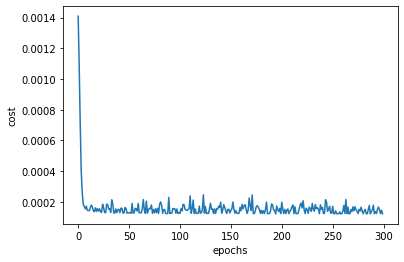

In [8]:
model4 = DNN(layer_dims, lRate=0.02, momentum=0.9, n_iters=300, GD_type='MiniBatchGD', batch_size=30000, optimizer='Momentum', regularizer='L2', regularizer_const=0.7)
costs_4 = model4.fit(X_train, y_train)
metrics = model4.performance(X_train, y_train)
print(metrics['accuracy'])
plt.plot(np.squeeze(costs_4))
plt.ylabel('cost')
plt.xlabel('epochs')
plt.show()

('Layer 1 W shape : (32, 29)', 'b shape : (32, 1)')
('Layer 2 W shape : (8, 32)', 'b shape : (8, 1)')
('Layer 3 W shape : (4, 8)', 'b shape : (4, 1)')
('Layer 4 W shape : (1, 4)', 'b shape : (1, 1)')
Cost after iteration0: 0.0005899832108072025
Cost after iteration10: 2.898959679116723e-05
Cost after iteration20: 6.944589863725806e-07
Cost after iteration30: 3.142161099468343e-06
Cost after iteration40: 4.6880103115108796e-07
Cost after iteration50: 5.410829437946594e-07
Cost after iteration60: 3.6922062068273597e-07
Cost after iteration70: 3.4794214203954476e-07
Cost after iteration80: 3.5791976624417696e-07
Cost after iteration90: 3.4299993333867825e-07
Cost after iteration100: 2.9100250044235567e-07
Cost after iteration110: 3.210838349868504e-07
Cost after iteration120: 2.5727437197180415e-06
Cost after iteration130: 1.3873376194872047e-06
Cost after iteration140: 4.093447193202201e-07
Cost after iteration150: 2.3305089363572617e-07
Cost after iteration160: 1.66896426207929e-07
Cost

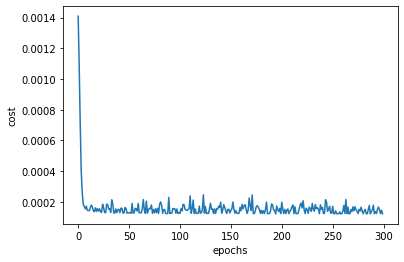

In [9]:
model5 = DNN(layer_dims, lRate=0.0002, momentum=0.9, beta=0.98, n_iters=300, GD_type='MiniBatchGD', batch_size=2048, optimizer='Adam')
costs_5 = model5.fit(X_train, y_train)
metrics = model5.performance(X_train, y_train)
print(metrics['accuracy'])
plt.plot(np.squeeze(costs_4))
plt.ylabel('cost')
plt.xlabel('epochs')
plt.show()

('Layer 1 W shape : (32, 29)', 'b shape : (32, 1)')
('Layer 2 W shape : (8, 32)', 'b shape : (8, 1)')
('Layer 3 W shape : (4, 8)', 'b shape : (4, 1)')
('Layer 4 W shape : (1, 4)', 'b shape : (1, 1)')
Cost after iteration0: 0.0007115987169397012
Cost after iteration10: 0.0007115595378937962
Cost after iteration20: 0.0007116686718742606
Cost after iteration30: 0.0007116008866535719
Cost after iteration40: 0.0007109893984816939
Cost after iteration50: 0.0006051774947166673
Cost after iteration60: 0.00022304289054076722
Cost after iteration70: 0.00013751062991279136
Cost after iteration80: 0.00012538075533544778
Cost after iteration90: 0.00013008552615231985
Cost after iteration100: 0.00010307736849887298
Cost after iteration110: 0.00010938253399998645
Cost after iteration120: 8.590549077474612e-05
Cost after iteration130: 8.292617695395565e-05
Cost after iteration140: 7.405707880000569e-05
Cost after iteration150: 6.780827181710726e-05
Cost after iteration160: 6.0082397267251496e-05
Cost 

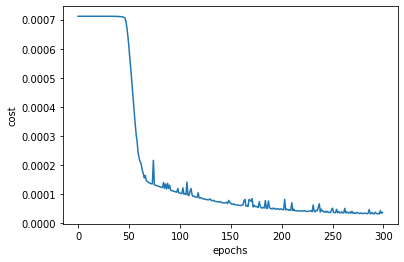

In [10]:
model5 = DNN(layer_dims, lRate=0.0001, momentum=0.9, beta=0.99, n_iters=300, GD_type='MiniBatchGD', batch_size=4096, optimizer='Adam', regularizer='L2', regularizer_const=0.7)
costs_5 = model5.fit(X_train, y_train)
metrics = model5.performance(X_train, y_train)
print(metrics['accuracy'])
plt.plot(np.squeeze(costs_5))
plt.ylabel('cost')
plt.xlabel('epochs')
plt.show()